In [55]:
import pandas as pd
import datetime as dt
from prophet import Prophet

data = pd.read_csv("../raw_data/stock_prices_latest.csv",parse_dates = True)
data.head()

,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
0,MSFT,2016-05-16,50.80,51.96,50.75,51.83,49.7013,20032017,1.0
1,MSFT,2002-01-16,68.85,69.84,67.85,67.87,22.5902,30977700,1.0
2,MSFT,2001-09-18,53.41,55.00,53.17,54.32,18.0802,41591300,1.0
3,MSFT,2007-10-26,36.01,36.03,34.56,35.03,27.2232,288121200,1.0
4,MSFT,2014-06-27,41.61,42.29,41.51,42.25,38.6773,74640000,1.0


In [56]:
data.shape

(23528435, 9)

In [57]:
data['date'] = pd.to_datetime(data['date'])

In [63]:
import numpy as np

stocks_df= data[(data.symbol=="JPM")]
stocks_df= stocks_df[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]
#stocks_df= stocks_df[(stocks_df.date.dt.year > 2015 ) & (stocks_df.date.dt.year < 2021)]
stocks_df.sort_values(by=["date"], inplace=True)
stocks_df

<ipython-input-63-3c77a0405e8a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  stocks_df= stocks_df[(data.date.dt.year == 2017) | (data.date.dt.year == 2018)]


,symbol,date,open,high,low,close,close_adjusted,volume,split_coefficient
12068053,JPM,2017-01-03,87.34,87.7600,85.9800,87.23,84.8665,20550714,1.0
12067260,JPM,2017-01-04,86.96,87.1800,86.4000,86.91,85.0222,15265665,1.0
12066088,JPM,2017-01-05,86.81,87.1100,85.2589,86.11,84.2396,14300638,1.0
12067396,JPM,2017-01-06,86.39,86.6200,85.9400,86.12,84.2494,12893298,1.0
12069250,JPM,2017-01-09,85.73,86.7700,85.5200,86.18,84.3081,12795648,1.0
...,...,...,...,...,...,...,...,...,...
18746383,JPM,2018-12-24,92.89,94.2200,92.1400,92.14,91.3871,17009280,1.0
18746505,JPM,2018-12-26,92.69,95.9600,91.1100,95.96,95.1759,22542900,1.0
18746510,JPM,2018-12-27,94.82,97.1500,93.5500,97.04,96.2471,20304683,1.0
18746623,JPM,2018-12-28,97.95,98.3200,96.4400,96.83,96.0388,17963271,1.0


In [32]:
#import numpy as np

#stocks_df= data[(data.symbol=="JPM")]
#stocks_df = stocks_df[(data.date.dt.year == 2016) | (data.date.dt.year == 2020)]
#stocks_df.sort_values(by=["date"], inplace=True)
#stocks_df

# Selectionner 10 actions de secteurs differents sur une periode de deux ans.
# GS,WMT,AAPL,AMZN,JPM,BA,CCL,CVX,KO,MSFT


In [64]:
stocks_df.shape

(502, 9)

In [65]:
stocks_df = stocks_df[["date", "close_adjusted"]].copy()  #à verifier, si il faut garder le .copy() ou pas
stocks_df.rename(columns={"date": "ds", "close_adjusted": "y"}, inplace=True)
stocks_df

,ds,y
12068053,2017-01-03,84.8665
12067260,2017-01-04,85.0222
12066088,2017-01-05,84.2396
12067396,2017-01-06,84.2494
12069250,2017-01-09,84.3081
...,...,...
18746383,2018-12-24,91.3871
18746505,2018-12-26,95.1759
18746510,2018-12-27,96.2471
18746623,2018-12-28,96.0388


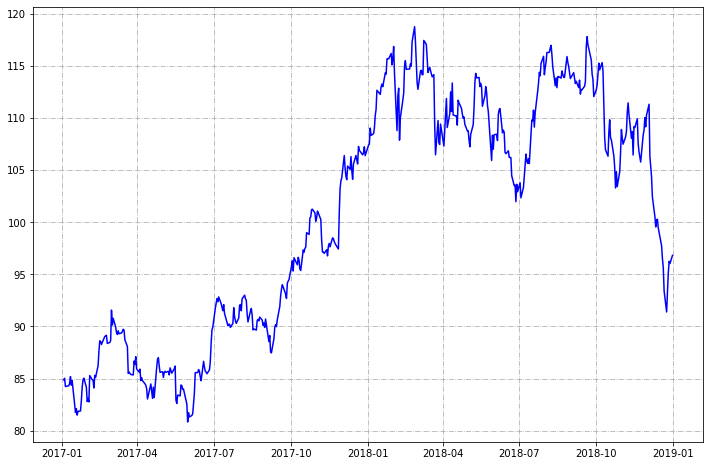

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.grid(linestyle='-.')

plt.plot(stocks_df['ds'], stocks_df['y'], 'b')
plt.show()

In [67]:
index=round(len(stocks_df)*80/100)
index

402

In [68]:
train = stocks_df.iloc[:index]
test = stocks_df.iloc[index:]

In [69]:
train.shape, test.shape

((402, 2), (100, 2))

In [70]:
train

,ds,y
12068053,2017-01-03,84.8665
12067260,2017-01-04,85.0222
12066088,2017-01-05,84.2396
12067396,2017-01-06,84.2494
12069250,2017-01-09,84.3081
...,...,...
18034619,2018-08-01,114.8628
18034691,2018-08-02,115.3494
18034648,2018-08-03,116.2830
18034705,2018-08-06,116.3128


In [71]:
model = Prophet(seasonality_mode='multiplicative', interval_width=0.95)
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [72]:
horizon = 36
future = model.make_future_dataframe(periods=horizon, freq='MS')
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
433,2021-04-01,107.095961,-395.172135,580.099012
434,2021-05-01,-124.718165,-697.927113,486.365146
435,2021-06-01,106.924559,-437.345389,620.733955
436,2021-07-01,106.872728,-458.330897,644.402691
437,2021-08-01,-124.455162,-782.476353,562.006400


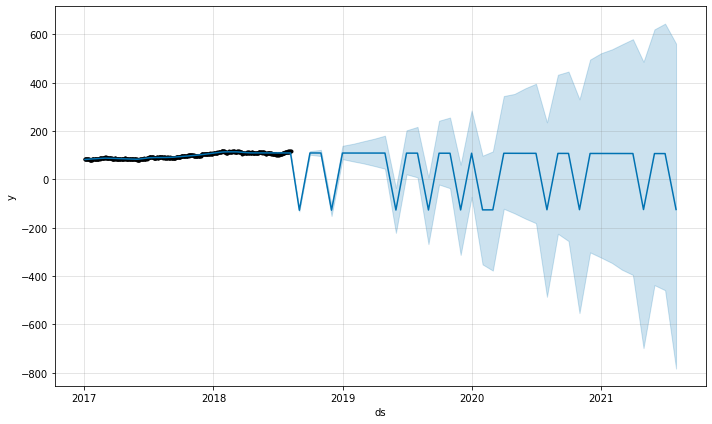

In [73]:
ax = model.plot(forecast);

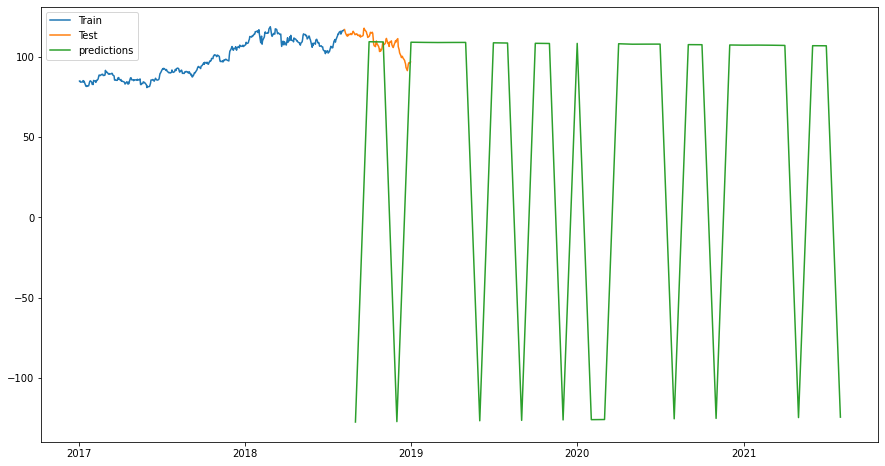

In [74]:
plt.figure(figsize=(15, 8))
plt.plot(train['ds'], train['y'], label="Train")
plt.plot(test['ds'], test['y'], label="Test")
plt.plot(forecast[-horizon:]['ds'], forecast[-horizon:]['yhat'], label="predictions")
plt.legend(loc="best")
plt.show()

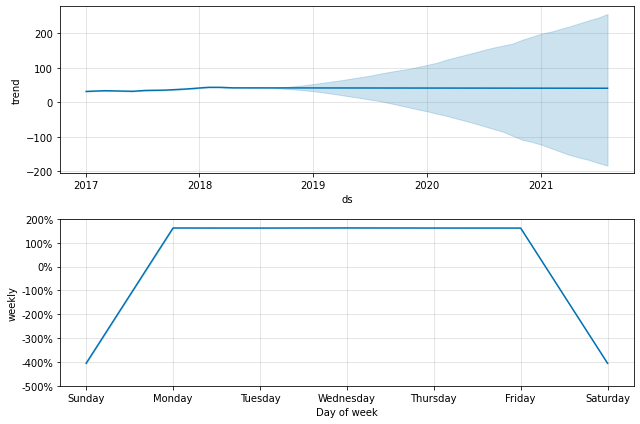

In [75]:
model.plot_components(forecast);

In [77]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
# Your code here
cv_results = cross_validation(model=model, initial=f'{20 * 5} days', horizon='35 days', period='180 days')

# Comment choisir le chiffre initial {XX*5} et horizon 'XX days' (ici initial=20 et horizon=75)

INFO:prophet:Making 3 forecasts with cutoffs between 2017-07-08 00:00:00 and 2018-07-03 00:00:00


  0%|          | 0/3 [00:00<?, ?it/s]

In [49]:
cv_results

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2003-06-23,19.431859,16.299563,22.616317,22.7125,2003-06-21
1,2003-06-24,19.382299,16.185663,22.271352,23.0145,2003-06-21
2,2003-06-25,19.350528,16.024160,22.400821,22.8065,2003-06-21
3,2003-06-26,19.334917,16.571161,22.385992,23.0816,2003-06-21
4,2003-06-27,19.293527,15.973673,22.470807,22.7461,2003-06-21
...,...,...,...,...,...,...
6284,2016-04-12,70.608065,39.258041,94.936896,56.8160,2015-04-19
6285,2016-04-13,70.665920,39.937464,94.903013,59.2216,2015-04-19
6286,2016-04-14,70.779200,40.896308,96.607639,59.9884,2015-04-19
6287,2016-04-15,70.821911,39.766687,95.920059,59.2983,2015-04-19


In [78]:
stocks_df_p = performance_metrics(cv_results)
stocks_df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4 days,2.234722,1.494899,1.150913,0.011338,0.007032,0.011246,1.000000
1,5 days,1.742269,1.319950,1.034430,0.010258,0.008603,0.010191,1.000000
2,6 days,1.497585,1.223758,1.118501,0.011097,0.010221,0.011098,1.000000
3,7 days,2.161923,1.470348,1.316687,0.012635,0.010221,0.012678,1.000000
4,8 days,4.462122,2.112374,1.717931,0.016004,0.017748,0.016143,0.857143
5,9 days,5.282997,2.298477,1.832824,0.017663,0.017748,0.017712,0.714286
6,10 days,6.539396,2.557224,1.995103,0.020075,0.006975,0.019983,0.571429
7,11 days,8.491874,2.914082,2.369546,0.024639,0.035883,0.024387,0.428571
8,12 days,10.110772,3.179744,2.820347,0.029987,0.035883,0.029539,0.285714
9,13 days,16.258004,4.032122,3.877331,0.039389,0.044098,0.039107,0.071429


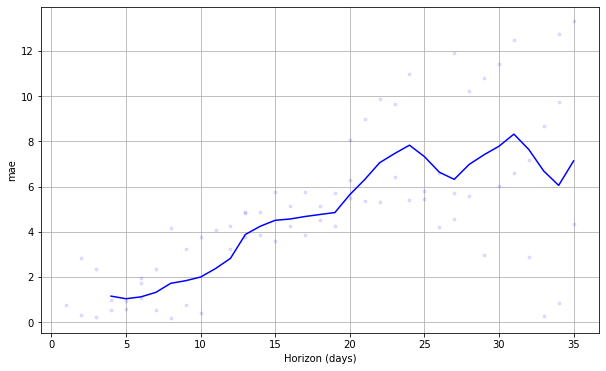

In [79]:
# Plot results below
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(cv_results, metric='mae');